# Importing LabChart (Python)

This notebook will help you explore and plot *any* exported .txt file from LabChart.

<mark>To run this, you will need to upload an exported .txt file from LabChart into Colab. First, [export the channels you'd like to plot](https://bipn145.github.io/LabChart/ExportingLabChart.html). Then [upload the exported file it to Colab](https://bipn145.github.io/intro.html).</mark>

## Step 1. Setup

>**Task**: Run the cell below to import our necessary packages and configure the notebook environment.

In [1]:
# Import our packages
import matplotlib.pyplot as plt
import numpy as np

print('Packages imported.')

Packages imported.


## Step 2. Import data
Now that we have our notebook configured, we can import our data. We will import it as a numpy array.

To do so:

1. Upload your file into the same folder as this code.
2. Change the filename below to your filename.
3. Define a list of column names. If you exported one channel, you'll have just two columns, given as two strings in a list: `['time','recording']`. This is in the code by default. However, you should add a column name **if** you exported more than one channel. In other words, you could write `['time','recording_1','recording_2']`.

In [2]:
# Change the filename to EXACTLY match your file
filename = 'leech spontaneous recording.txt'

# Load & check shape of file
data = np.genfromtxt(filename, dtype=float, skip_header=6, delimiter='\t',encoding = 'unicode_escape')

if data.shape[1] == 2:
    time, recording = data[:,0], data[:,1]
    print('Stored file with two columns as recording & time.')
elif data.shape[1] == 3:
    time, recording = data[:,0], data[:,1]
    recording_2 = data[:,2]
    print('Stored file with two columns as recording_1, recording_2, & time.')
else:
    print('Invalid data file. Please upload a .txt file exported from LabChart with one or two channels.')

Stored file with two columns as recording_1, recording_2, & time.


## Modify axes units *(optional)*

LabChart data *should* export by volts and second by default. We can inspect the timestamps to see whether these are in milliseconds or seconds.

**Note**: Remember that if your data was collected at 40,000 Hz (40 kHz), this means that there is 1/40,000 (or 0.000025) seconds between each data point. 

In [3]:
try:
    print('\nTime between each data point is:')
    print(time[1]-time[0],' seconds')
except NameError:
    print('You do not currently have a known time axis.')
    length = input('What is the length of your recording in seconds?')
    time = np.linspace(0,float(length)+1,len(recording))
    print(time)


Time between each data point is:
2.4999999999997247e-05  seconds


Instead of showing the axes in seconds, you might choose to show it in milliseconds. To do so, we should multiply the entire array by 1000, to convert from **s** to **ms**. You can multiply arrays in Python by taking the original array, and writing an expression to multiple it. For example:

```
array_s = np.array([0.000 , 0.0010 , 0.0020 , 0.0030 ])
array_ms = array_s * 1000
```

> **Task**: Create an array of timestamps in milliseconds by multiplying `time` by 1000. Assign it to `timestamps_ms`. Check that this worked by printing `timestamps_ms`.

In [4]:
# Convert into ms here
timestamps_ms = ...

Now you should have a `timestamps_ms` variable that you can plot with below, if you'd like!

## Step 3. Plot data
The code below will plot your data using [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). This function requires two inputs: x and y. When we're plotting recordings, typically this means x = time, and y = voltage. If you'd like to plot your timestamps in milliseconds, you'll need to replace `time` with `timestamps_ms`. You should also add x and y labels.

/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/

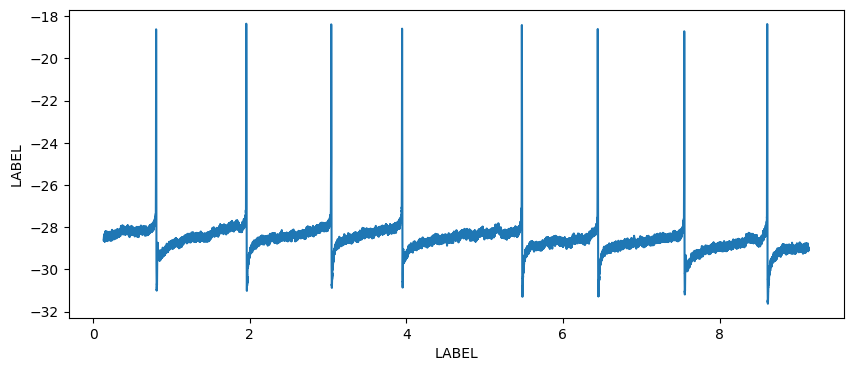

In [5]:
# Set up figure & plot
fig,ax = plt.subplots(figsize=(10,4))

# Plot the data
plt.plot(time,recording)

# X label
plt.xlabel('LABEL') 

# Y label
plt.ylabel('LABEL') 

# This makes the axis labels print without scientific notation
# You can comment this line if you do not wish to use it
ax.ticklabel_format(useOffset=False, style='plain') 

# You can uncomment the line below to restrict the x axis plotting
#plt.xlim([200,700])

plt.show()

Once you've filled out this notebook, you can use this to plot *any* exported text file from LabChart, from earthworms, to leeches, and beyond!